# **Mount Google Drive & Upload Files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
src = list(files.upload().values())[0]
open('lbg.py','wb').write(src)
src = list(files.upload().values())[0]
open('compression.py','wb').write(src)
src = list(files.upload().values())[0]
open('plotting_utils.py','wb').write(src)

Saving lbg.py to lbg.py


Saving compression.py to compression.py


Saving plotting_utils.py to plotting_utils.py


1791

# **Raw image & Compression**

In [3]:
import cv2
import lbg
import compression
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from compression import measure_psnr, sim_testing_protocol
%matplotlib inline

In [5]:
root = '/content/drive/My Drive/SC/'
img_list = ["lenna", "mandrill", "scene", "tiffany", "jet", "peppers", "face", "face2", "lennaOr", "lennaVQ"]
for img_name in img_list:
  rawData = open(root+"images/"+img_name+".raw", 'rb').read()
  if img_name == "face":
    imgSize = (128,128)
  elif img_name == "face2":
    imgSize = (128,128)
  else:
    imgSize = (512,512)
  # Use the PIL raw decoder to read the data.
  # the 'F;16' informs the raw decoder that we are reading 
  # a little endian, unsigned integer 16 bit data.
  img = Image.frombytes('L', imgSize, rawData)
  img.save(root+"images/"+img_name+".png")

### **(1) Trainning with single image**

CPU times: user 11min 22s, sys: 152 ms, total: 11min 22s
Wall time: 11min 23s


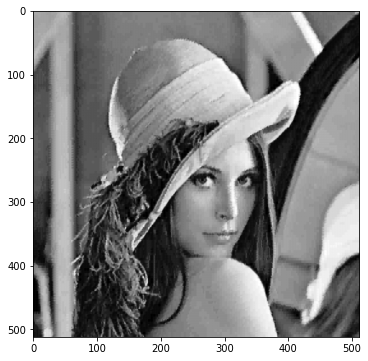

In [ ]:
for img_name in img_list:
  img = cv2.imread(root+'images/'+img_name+'.png', cv2.IMREAD_GRAYSCALE)
  %time compression.sim_protocol(img, 128, 0.0005, (4,4), root+'simulation/', img_name+'_128')
  # (image, codeblock size, eplsilon, block size, )

### **(2) Train with multiple image**

In [ ]:
# Trainning
trainning_set = [root+'images/lenna.png', root+'images/mandrill.png', root+'images/scene.png', root+'images/tiffany.png']
%time compression.sim_multi_protocol(trainning_set, 512, 0.0005, (4,4), root+'trainning_output/', 'weight')

rem:  lenna.png


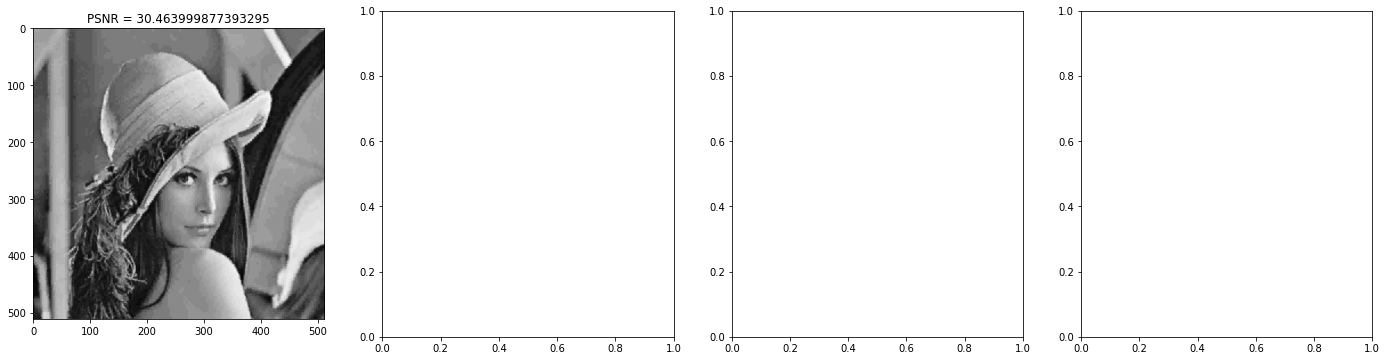

CPU times: user 24.2 s, sys: 48.1 ms, total: 24.2 s
Wall time: 24.2 s
rem:  mandrill.png


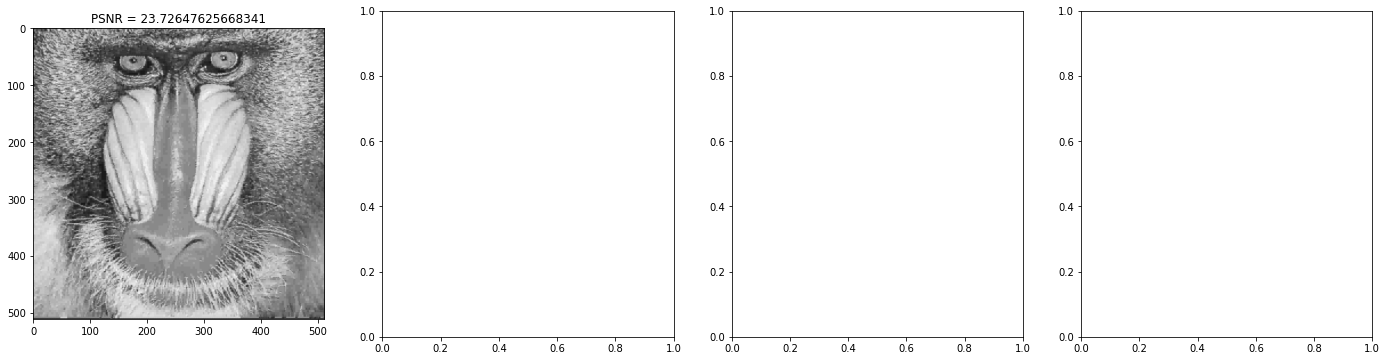

CPU times: user 24.3 s, sys: 39.5 ms, total: 24.4 s
Wall time: 24.3 s
rem:  scene.png


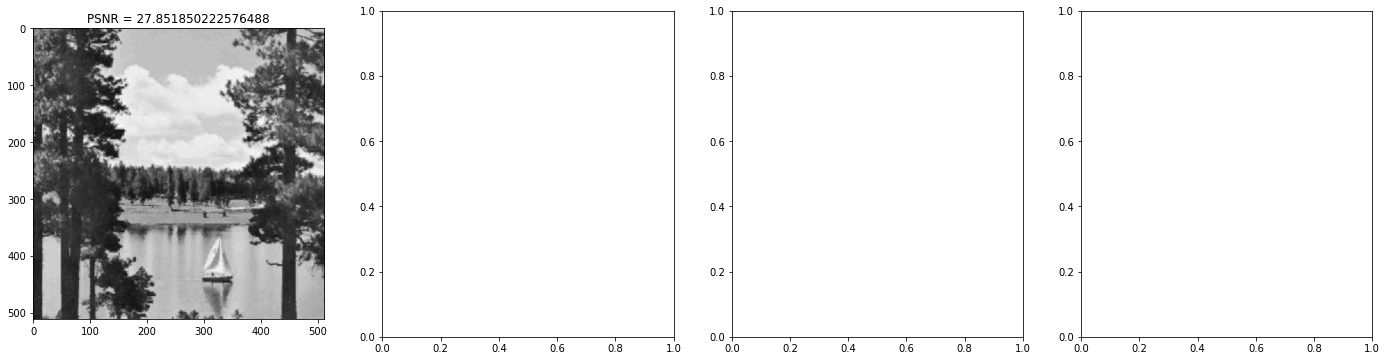

CPU times: user 24 s, sys: 65.7 ms, total: 24 s
Wall time: 24 s
rem:  tiffany.png


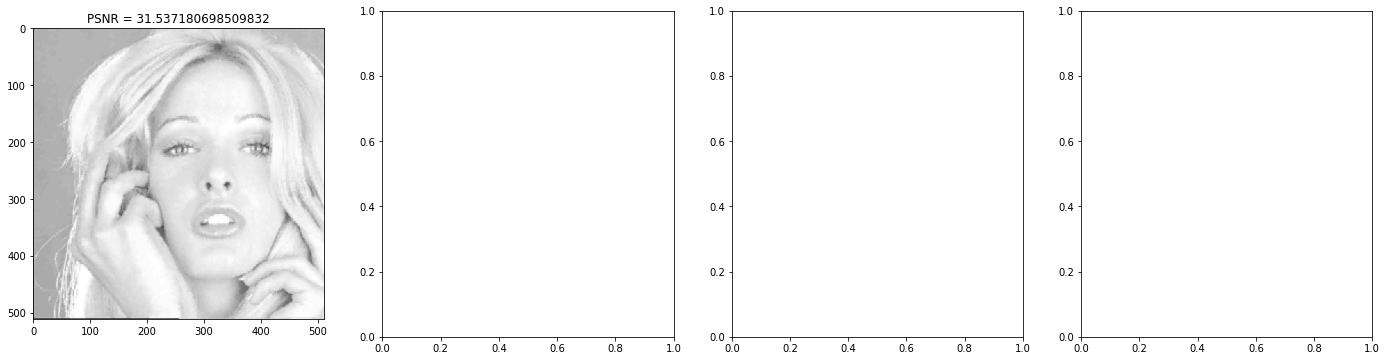

CPU times: user 23.9 s, sys: 51.9 ms, total: 24 s
Wall time: 24 s


In [9]:
# Testing on trainning set
trainning_set = [root+'images/lenna.png', root+'images/mandrill.png', root+'images/scene.png', root+'images/tiffany.png']
weight = root+'trainning_output/CB_weight.csv'
block = (4,4)
outpng = root+'testing_output/'
for img_name in trainning_set:
  %time sim_testing_protocol([img_name], weight, block, outpng)

rem:  jet.png


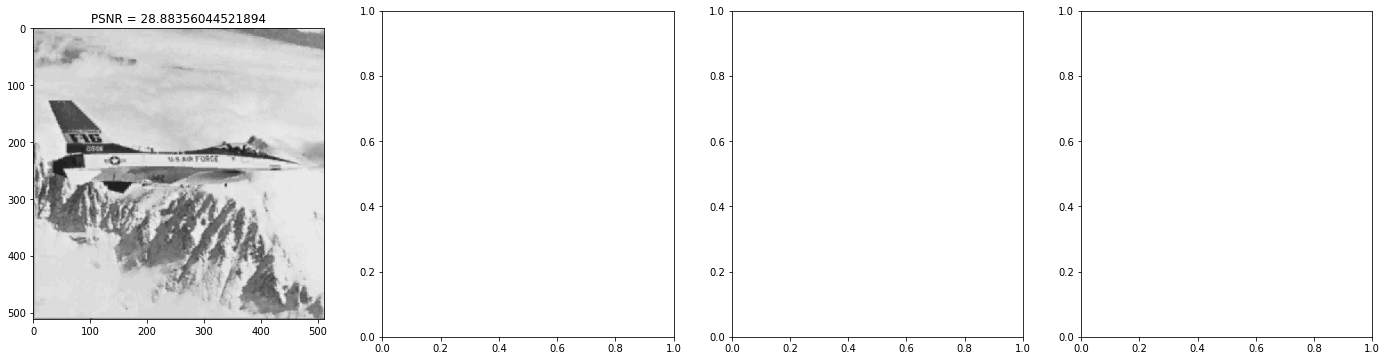

CPU times: user 24.4 s, sys: 21 ms, total: 24.4 s
Wall time: 24.9 s
rem:  peppers.png


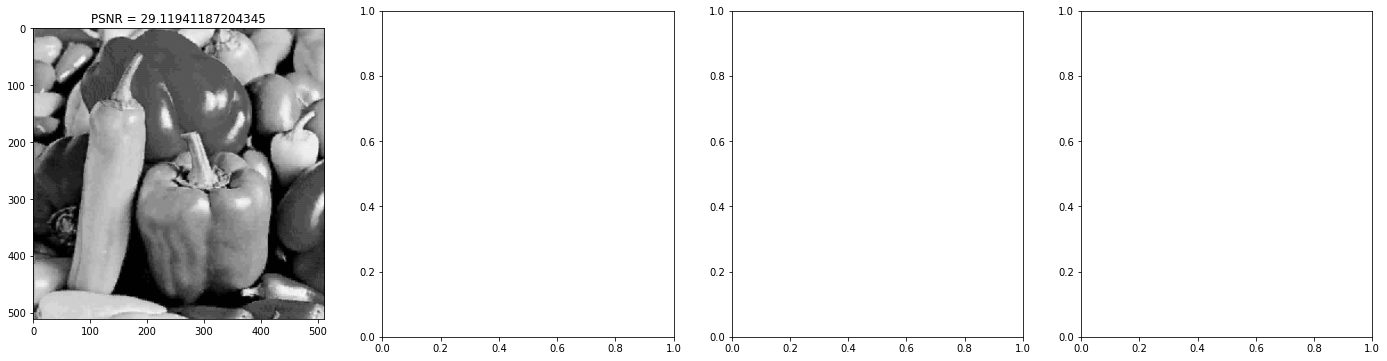

CPU times: user 24 s, sys: 46.8 ms, total: 24.1 s
Wall time: 24.1 s
rem:  face.png


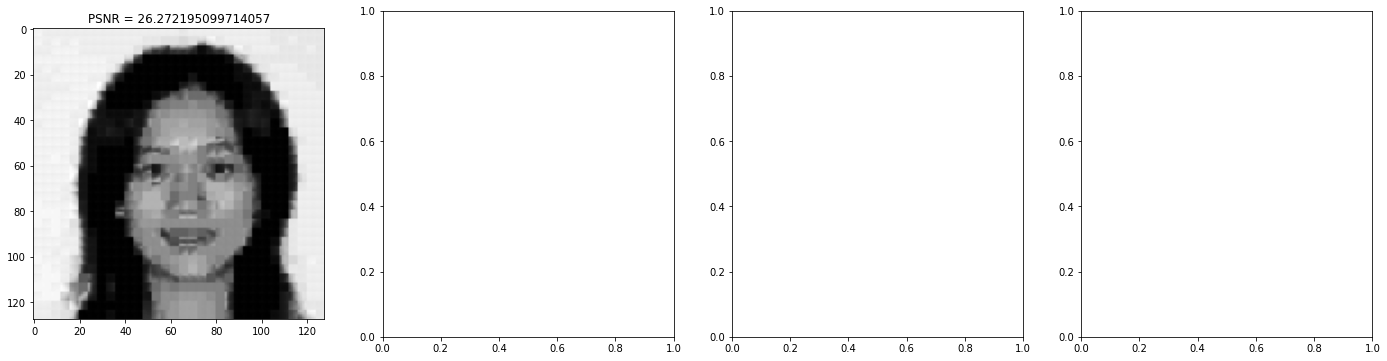

CPU times: user 2.04 s, sys: 14.1 ms, total: 2.06 s
Wall time: 2.06 s
rem:  face2.png


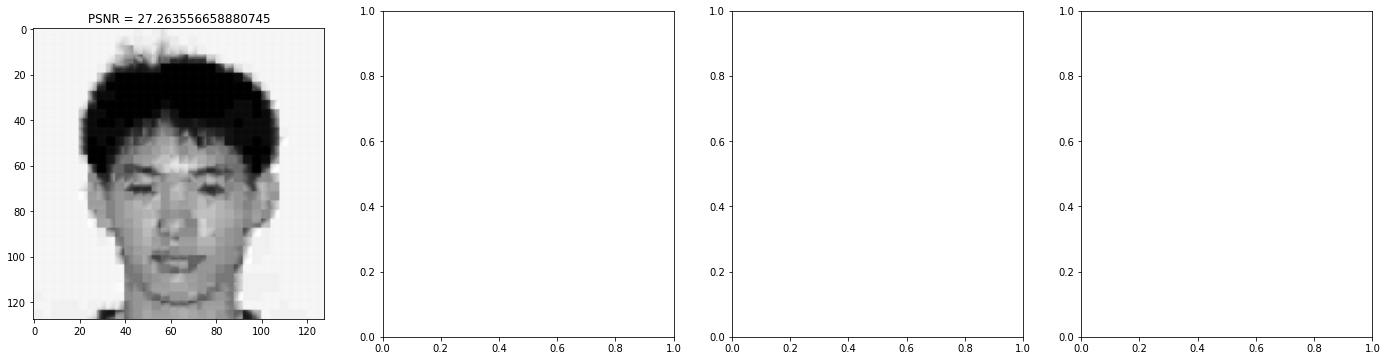

CPU times: user 2.03 s, sys: 18.2 ms, total: 2.05 s
Wall time: 2.04 s


In [6]:
# Testing on testing set
testing_set = [root+'images/jet.png', root+'images/peppers.png', root+'images/face.png', root+'images/face2.png']
weight = root+'trainning_output/CB_weight.csv'
block = (4,4)
outpng = root+'testing_output/'
for img_name in testing_set:
  %time sim_testing_protocol([img_name], weight, block, outpng)

# **Compute PSNR**

PSNR: 33.379222552413296


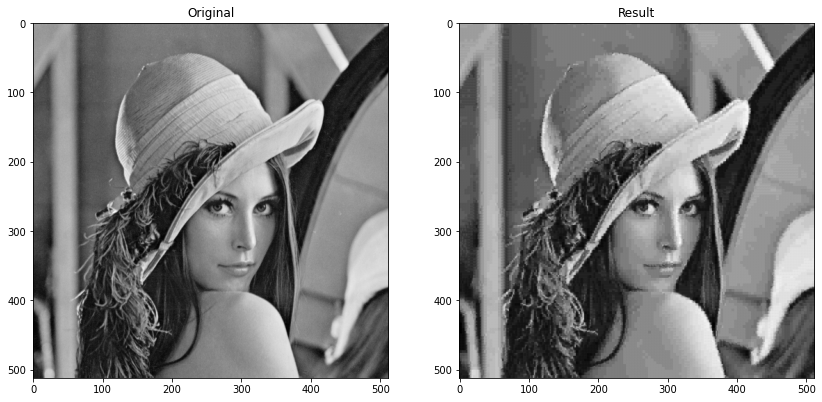

PSNR: 29.74783711275918


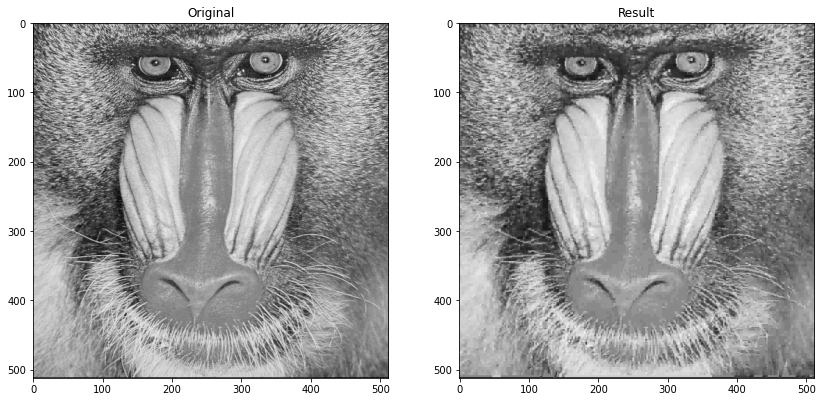

PSNR: 31.83414725128067


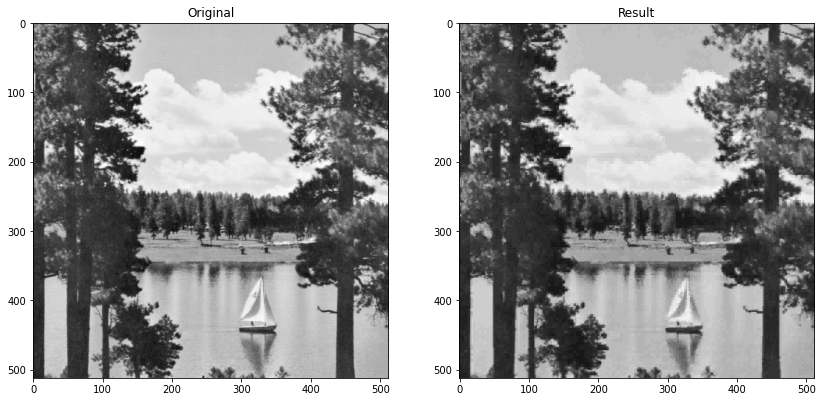

PSNR: 34.117580471315215


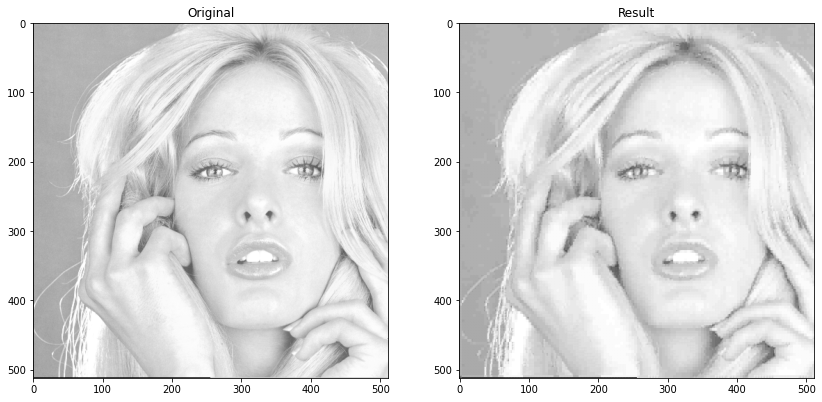

PSNR: 33.47924332561047


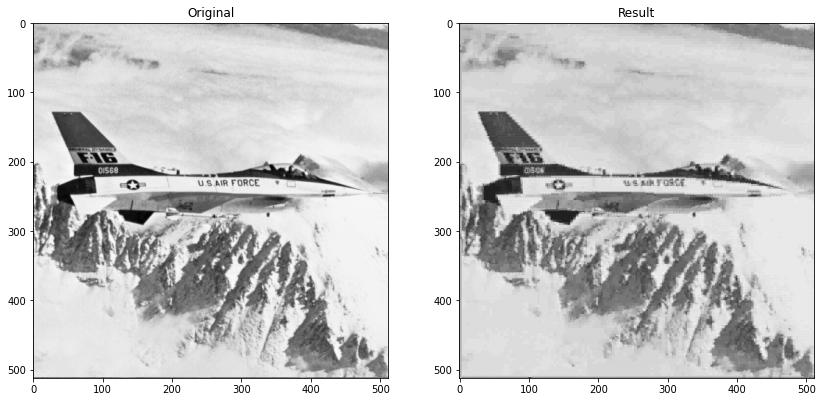

PSNR: 32.438728410078326


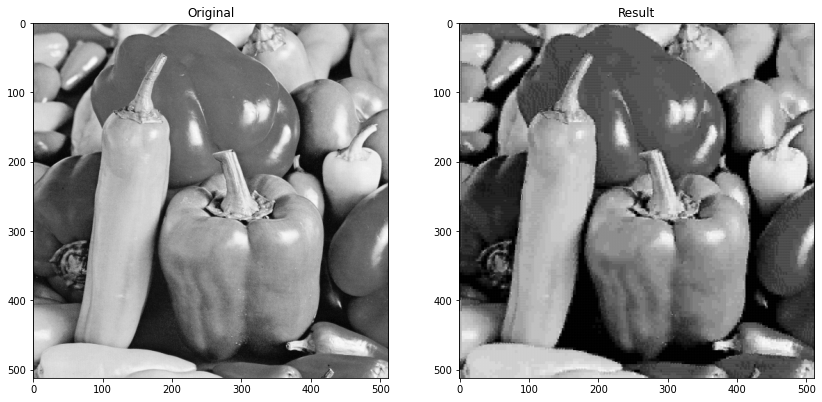

PSNR: 31.390517730887332


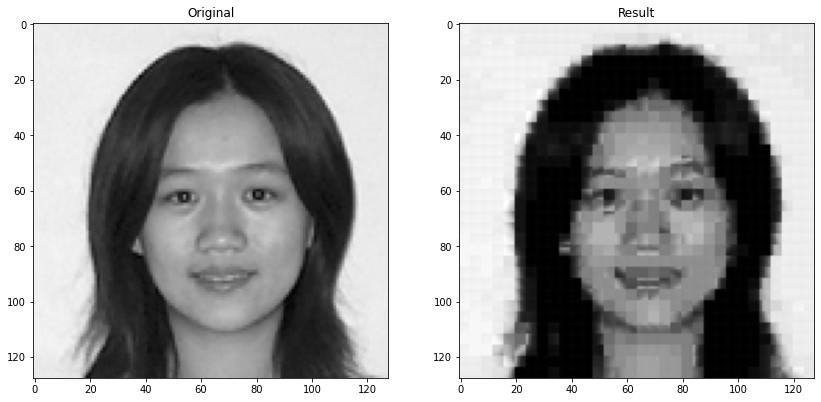

PSNR: 33.161588169920606


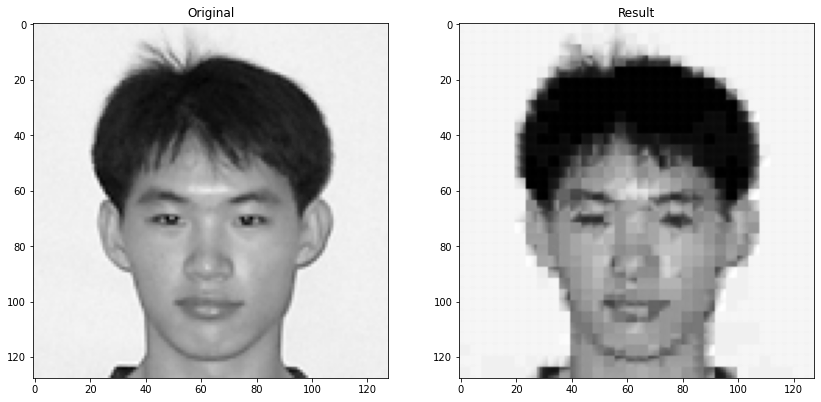

PSNR: 33.519306807224766


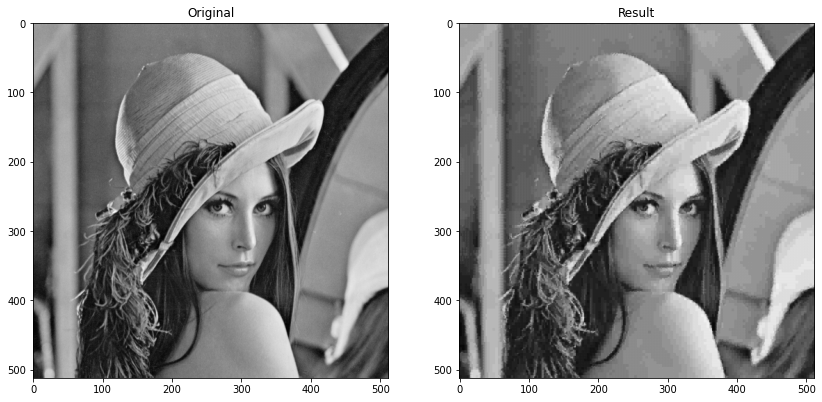

In [10]:
codeblock = '_128'
img_list = ["lenna", "mandrill", "scene", "tiffany", "jet", "peppers", "face", "face2"]
for img_name in img_list:
  measure_psnr(root+'images/'+img_name+'.png', root+'testing_output/'+img_name+'.png')

measure_psnr(root+'images/lennaOr.png', root+'images/lennaVQ.png')